In [1]:
!bash train_segRNN_B101_48.sh

Avvio training per il modello: SegRNN con finestra48
Using GPU
Args in experiment:
Basic Config
  Task Name:          long_term_forecast  Is Training:        1                   
  Model ID:           ETTh1_48_48         Model:              SegRNN              

Data Loader
  Data:               custom              Root Path:          ../data/final/      
  Data Path:          B101_50khz_downsampled_reduced.csvFeatures:           M                   
  Target:             Channel35           Freq:               h                   
  Checkpoints:        ./checkpoints/      

Forecasting Task
  Seq Len:            48                  Label Len:          24                  
  Pred Len:           48                  Seasonal Patterns:  Monthly             
  Inverse:            0                   

Model Parameters
  Top k:              5                   Num Kernels:        6                   
  Enc In:             62                  Dec In:             7                   
  C Out:

Shape metrics: (5,)
Shape preds: (55953, 48, 62)
Shape trues: (55953, 48, 62)
Metrics:
 [7.6998723e-01 1.0033079e+00 1.0016526e+00 3.1473866e+00 1.2372317e+05]


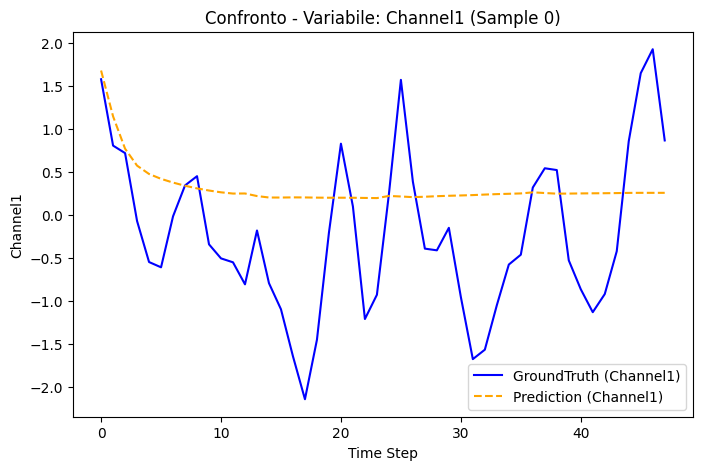

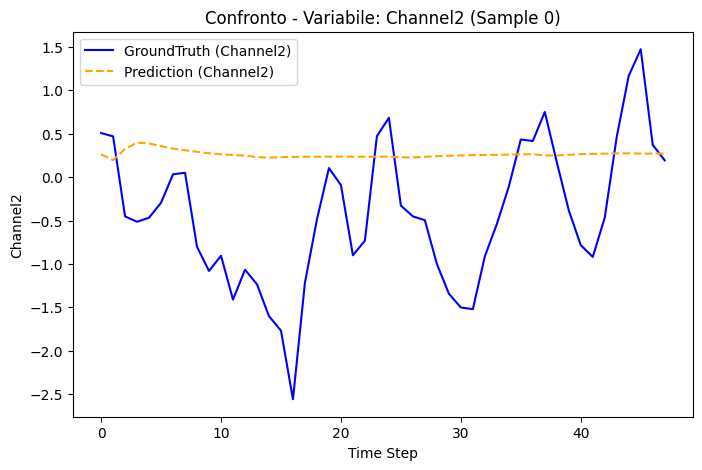

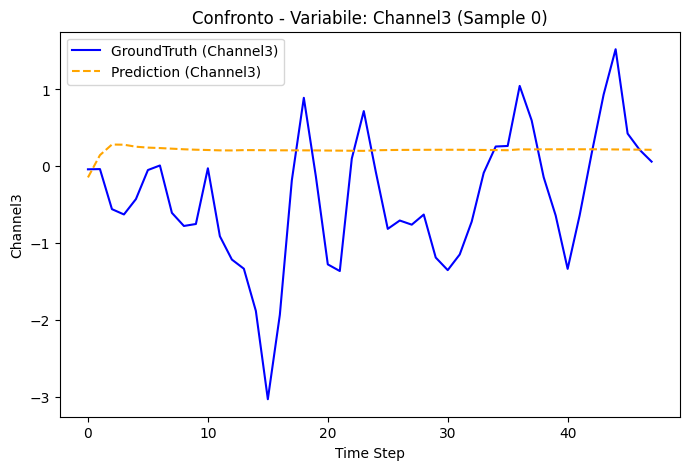

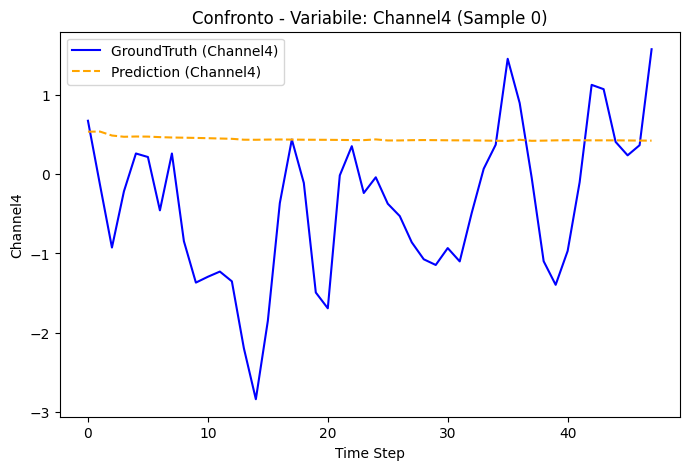

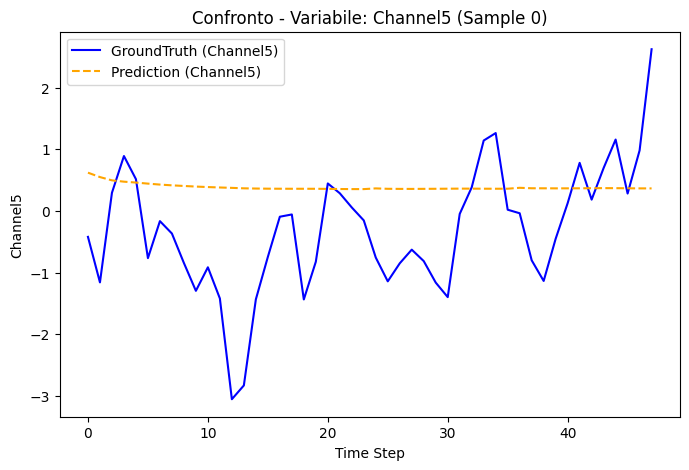

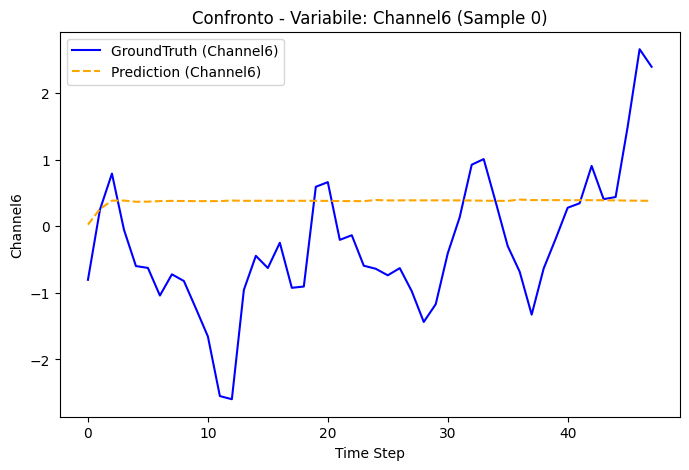

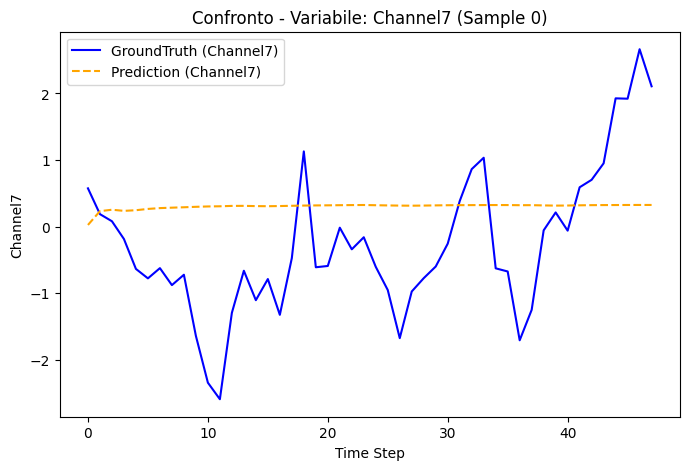

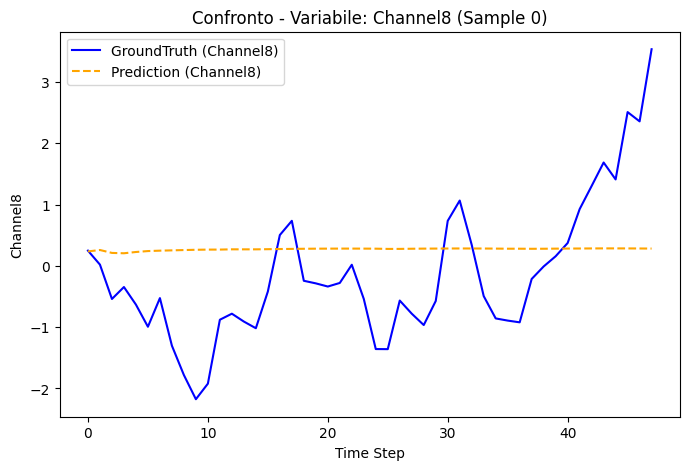

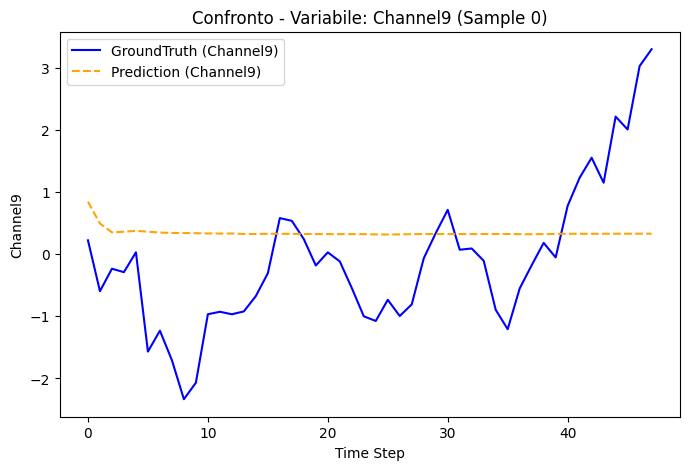

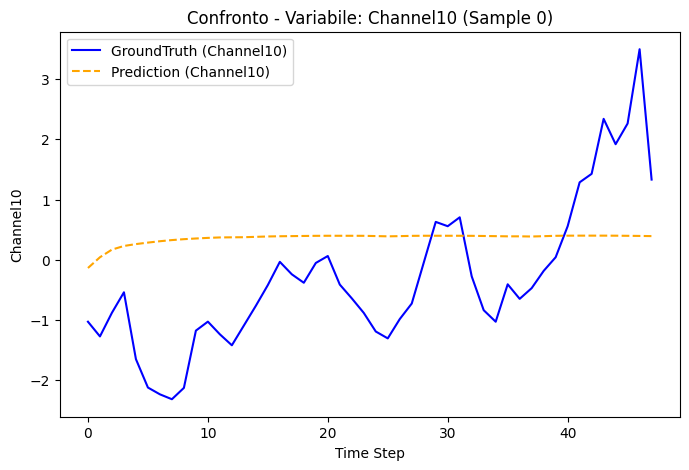

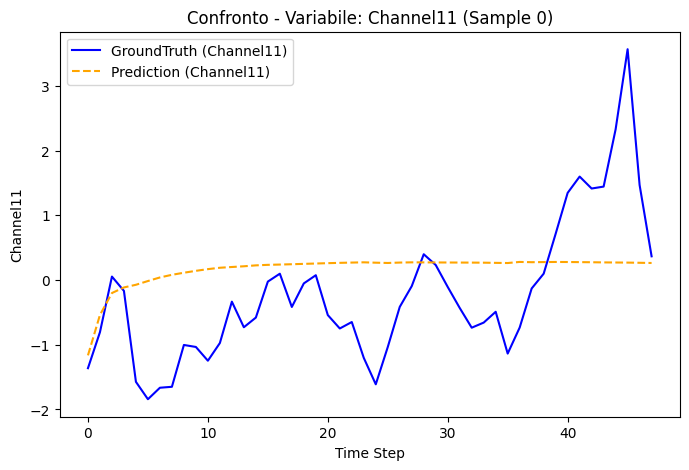

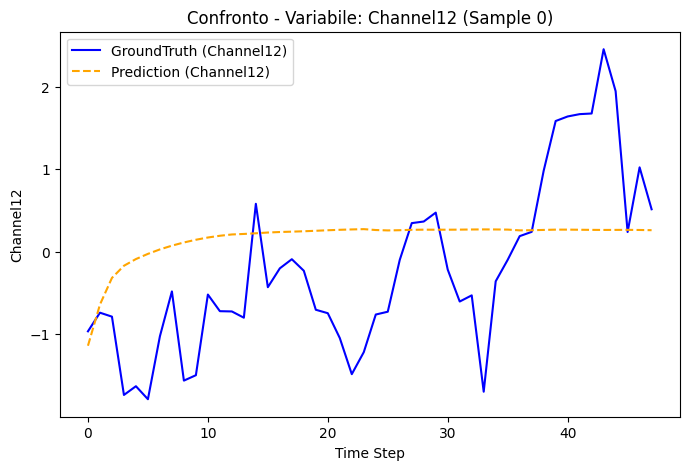

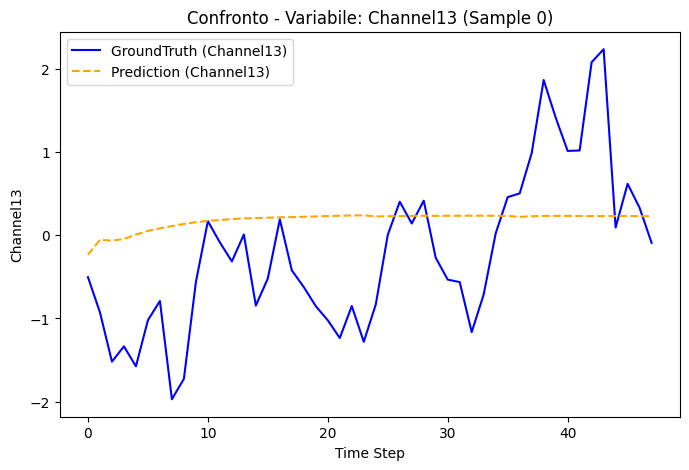

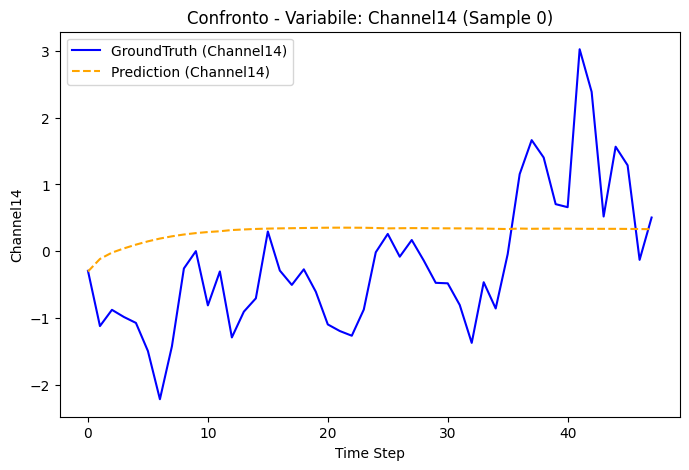

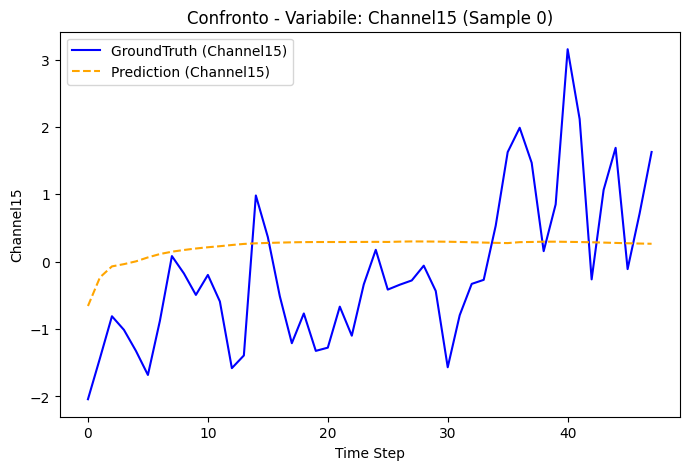

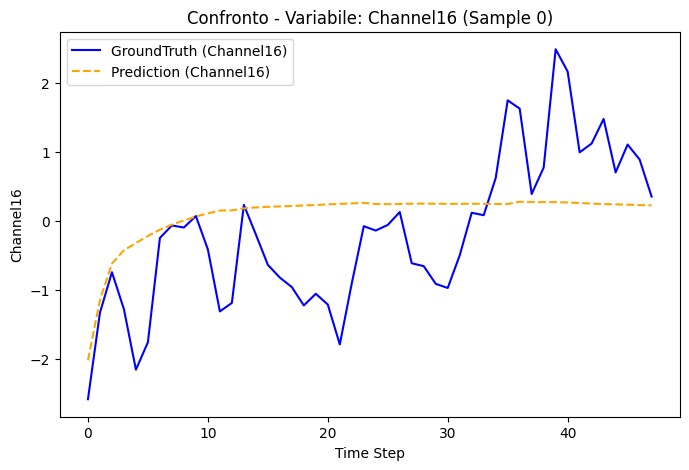

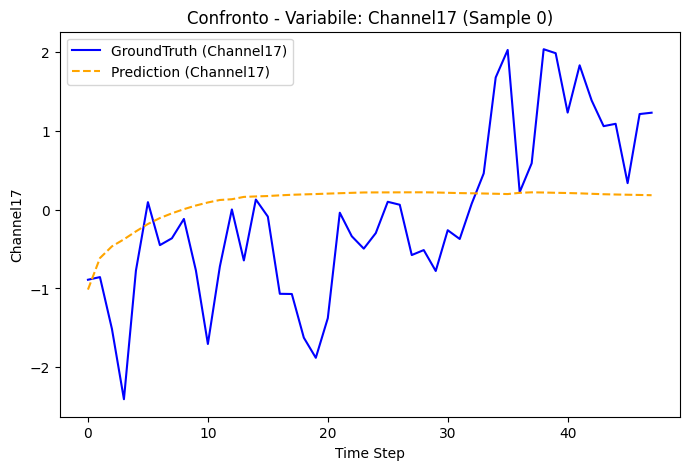

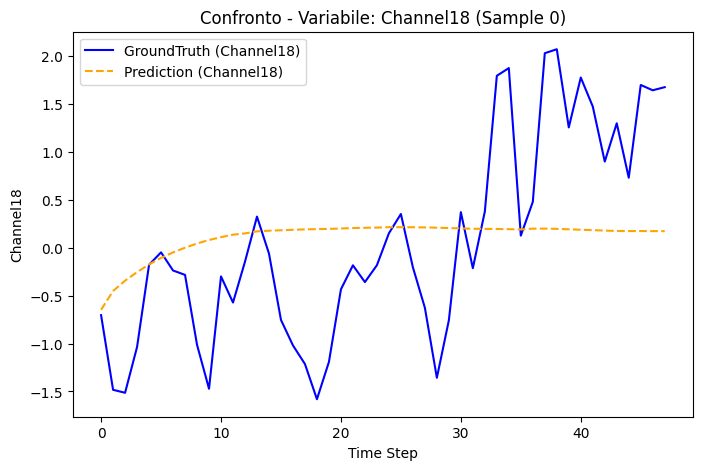

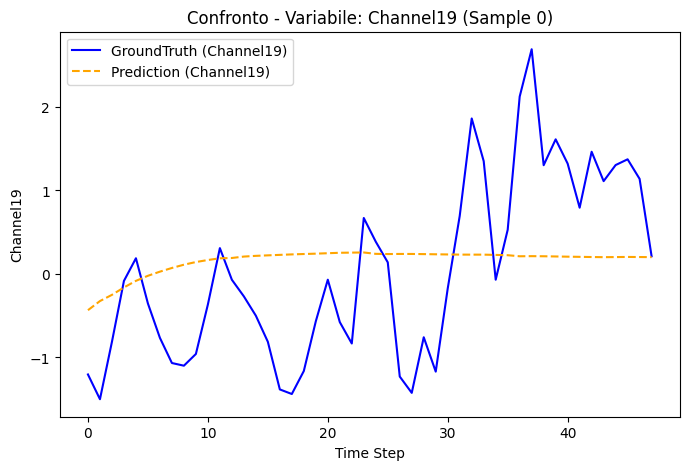

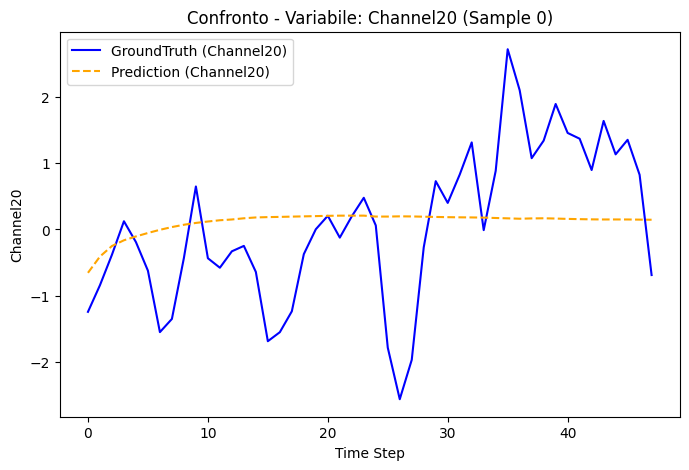

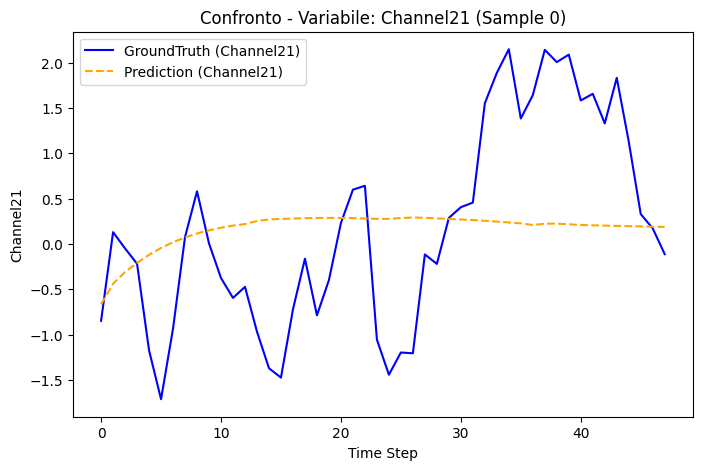

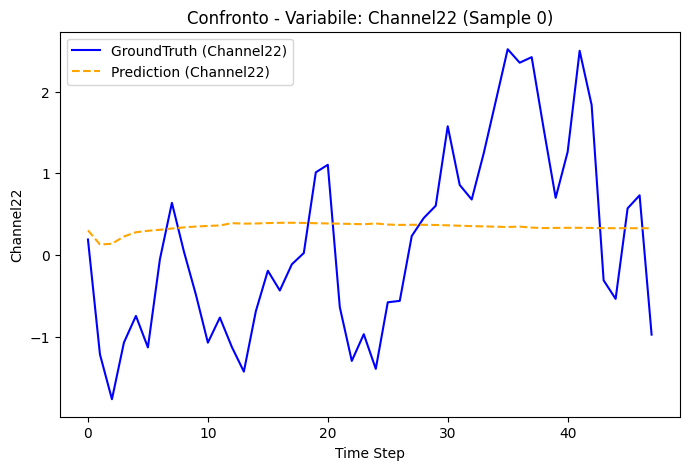

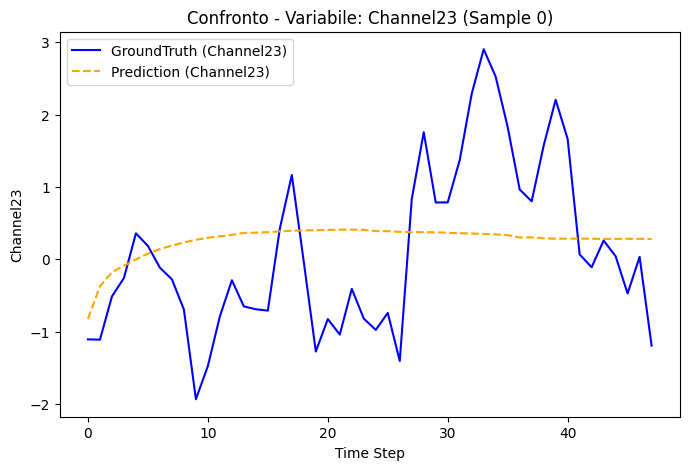

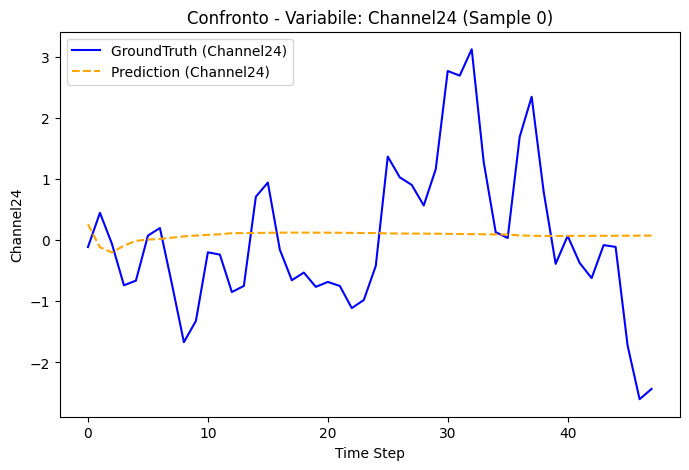

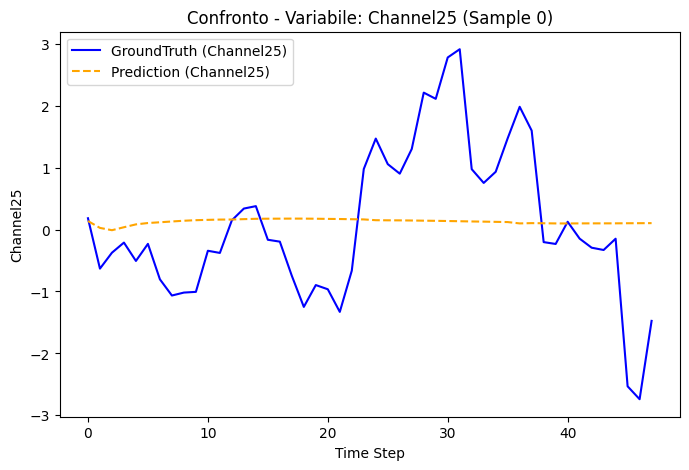

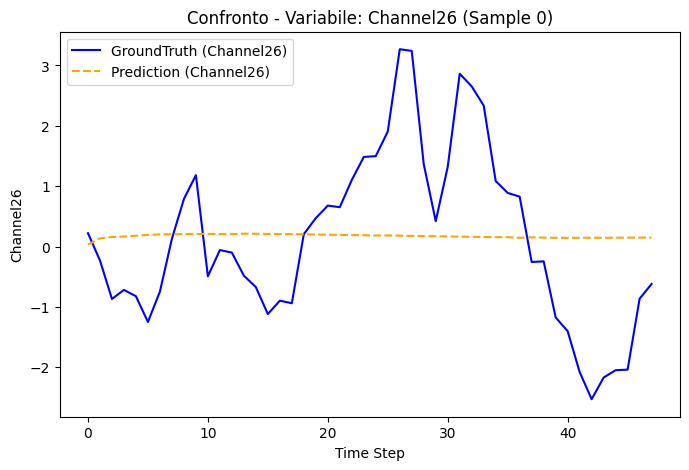

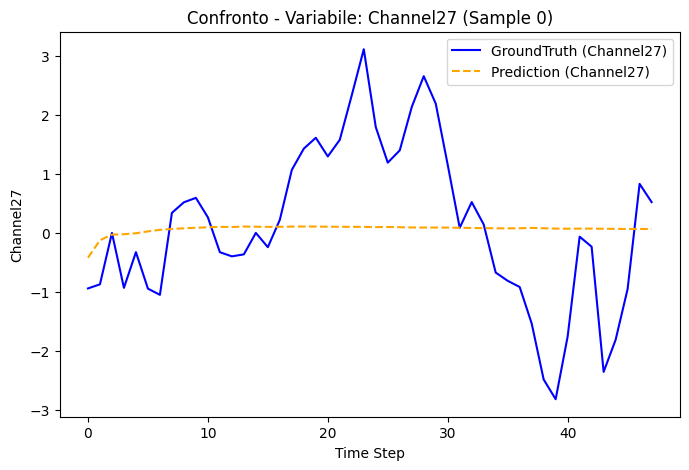

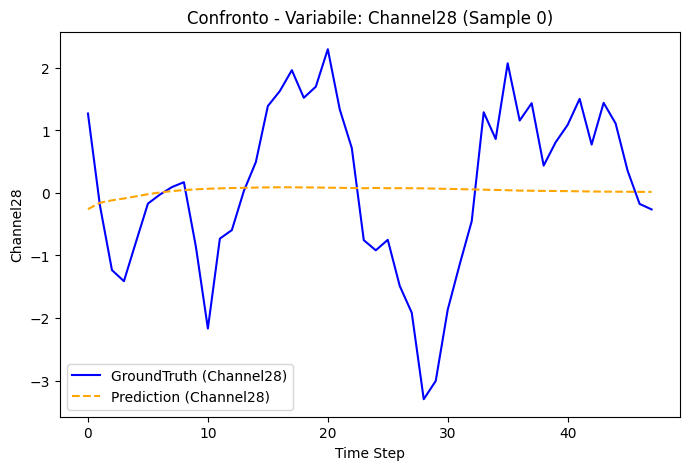

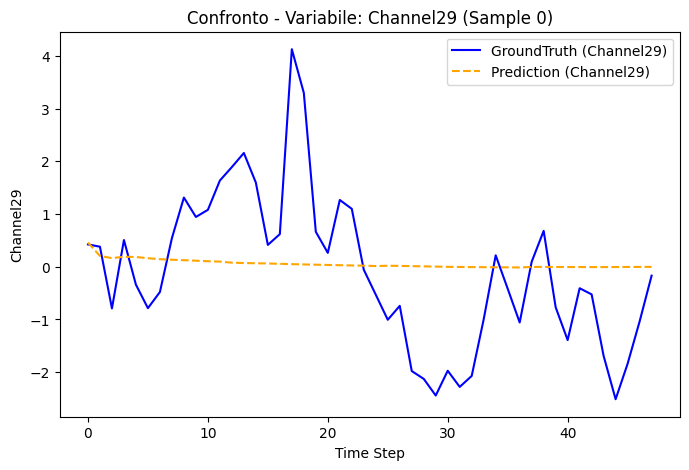

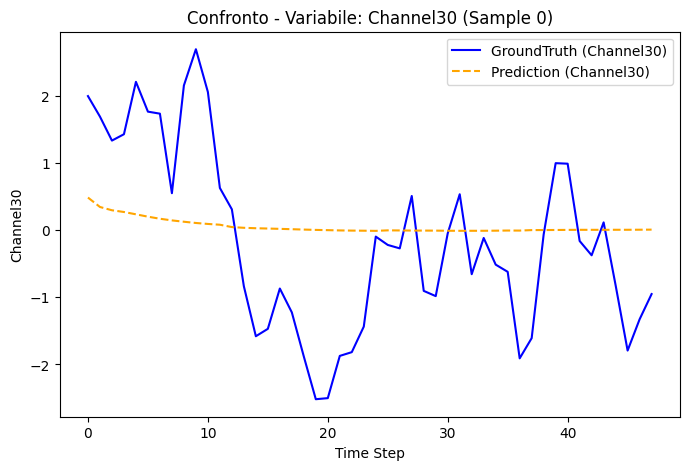

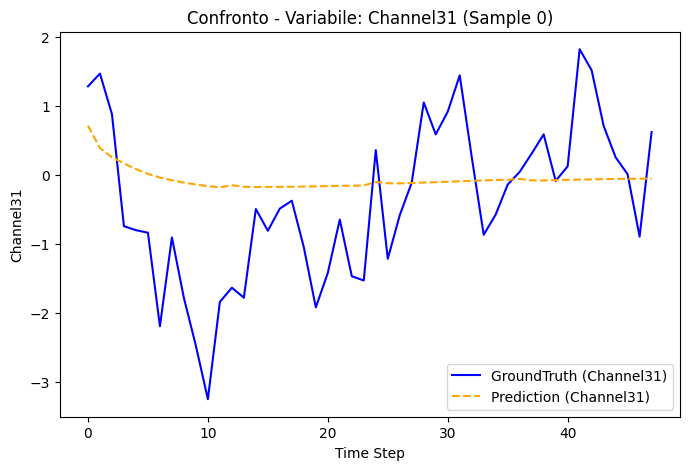

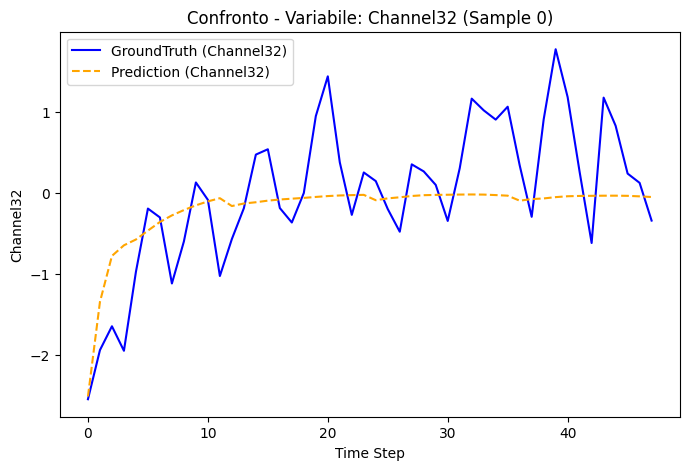

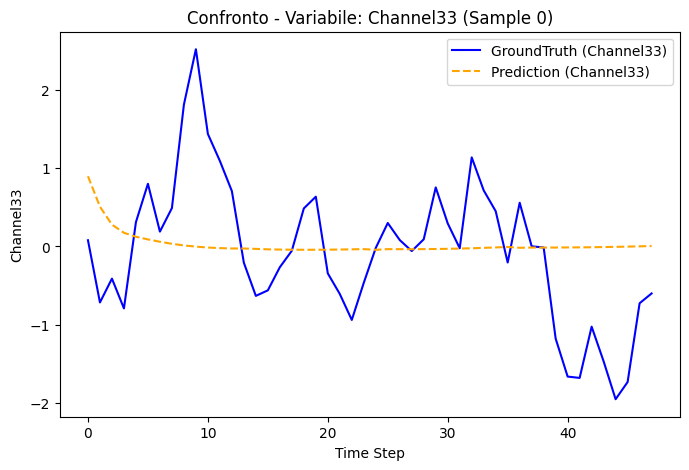

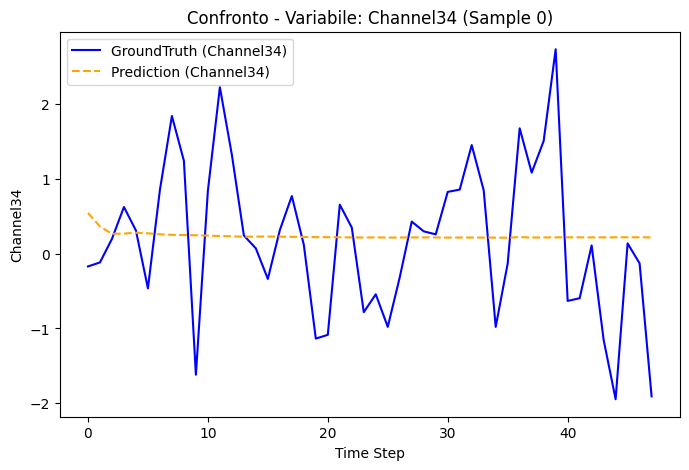

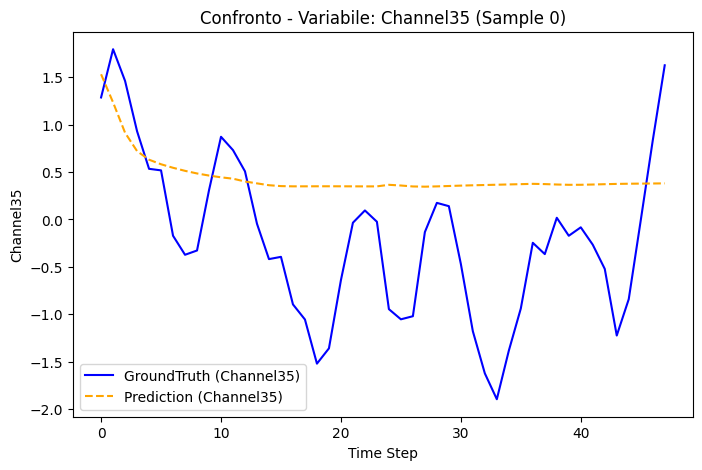

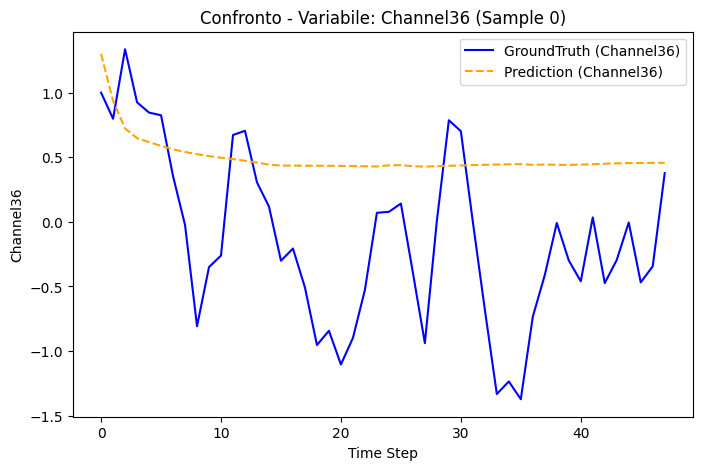

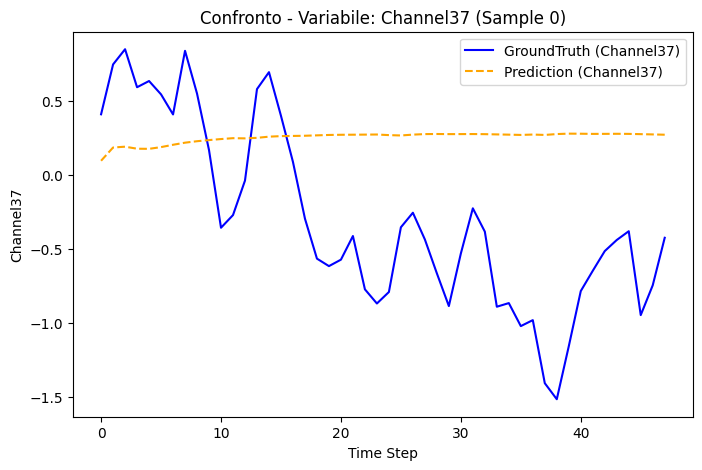

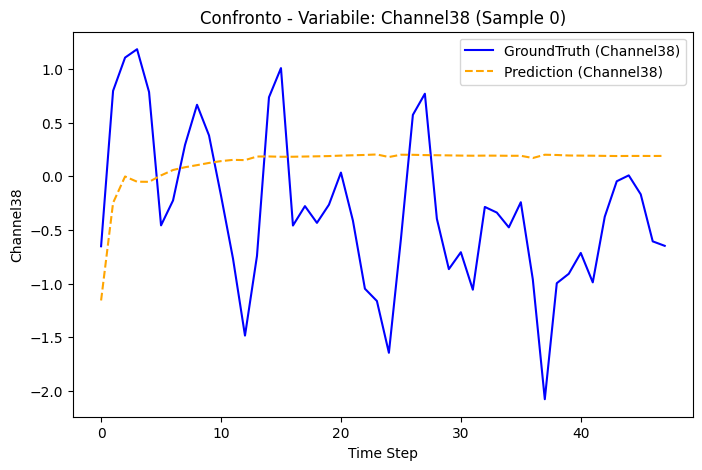

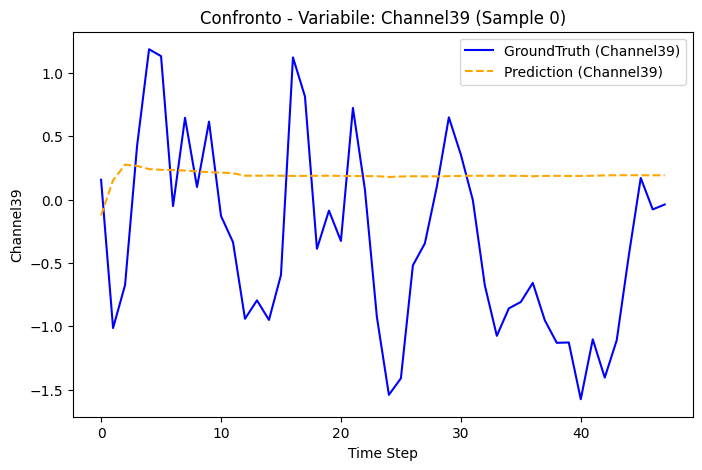

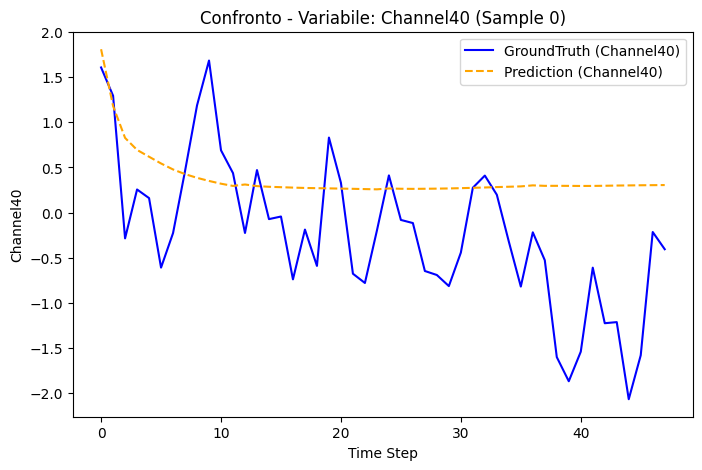

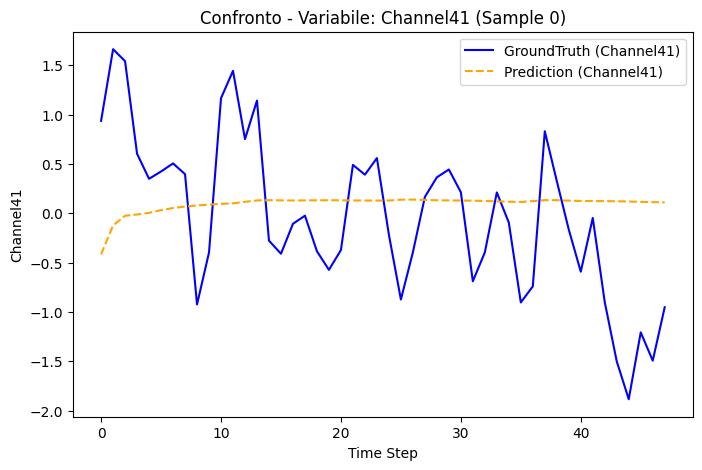

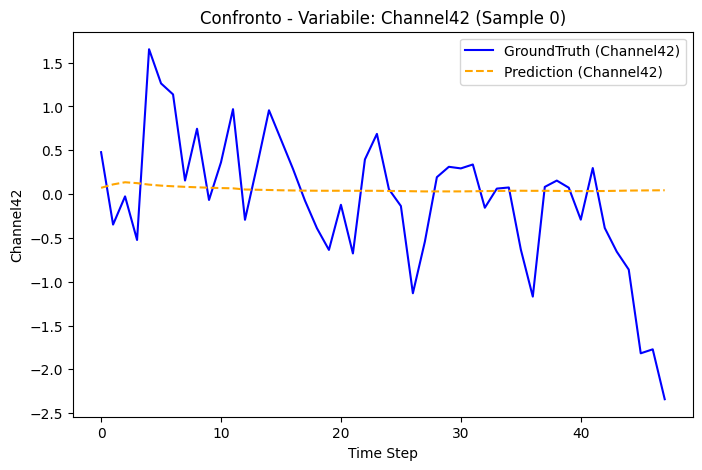

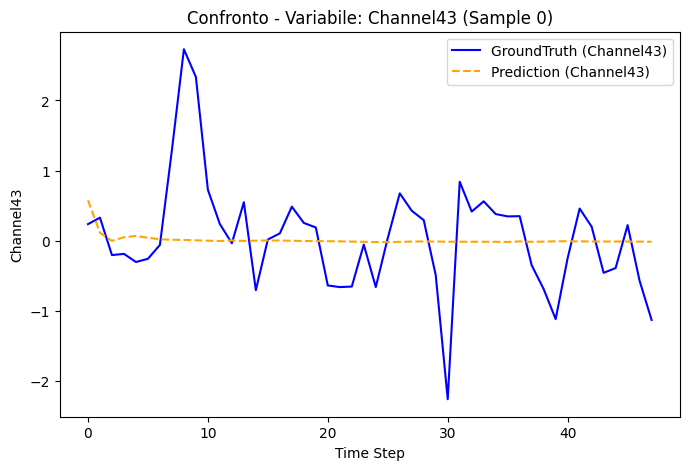

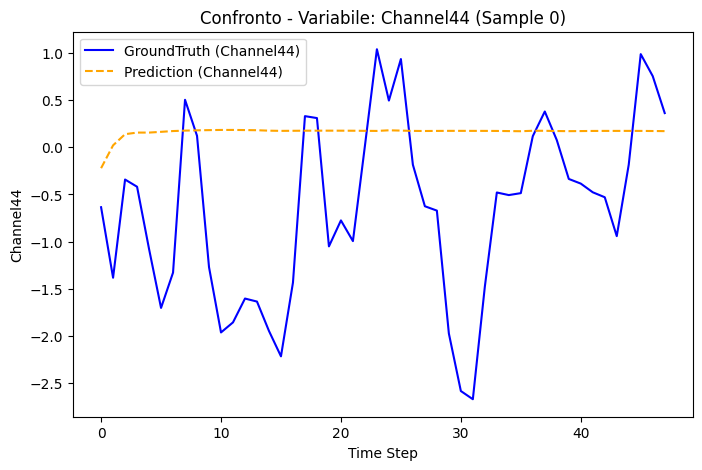

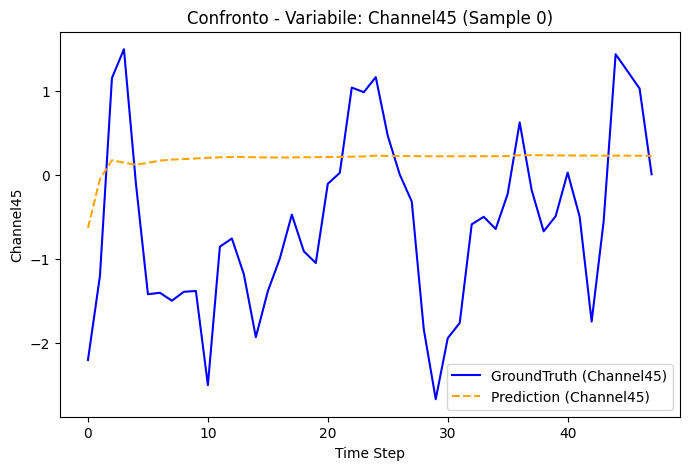

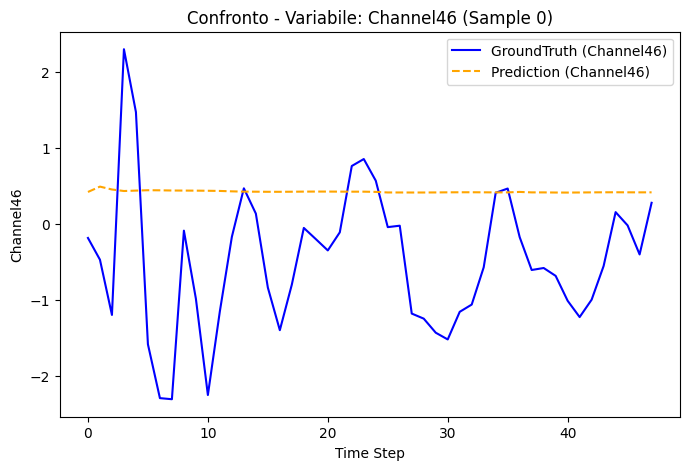

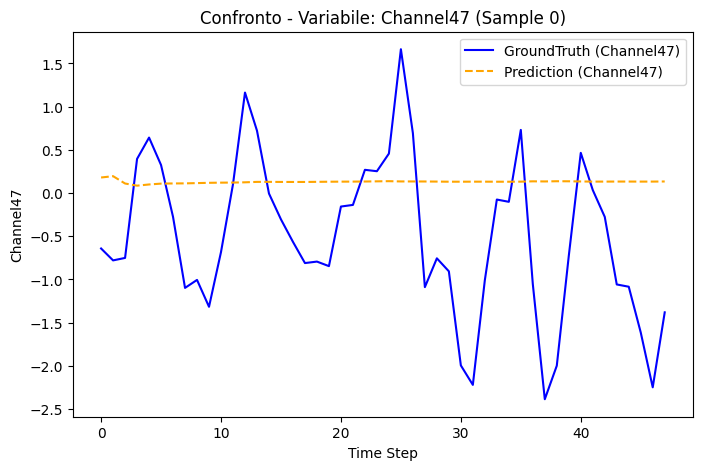

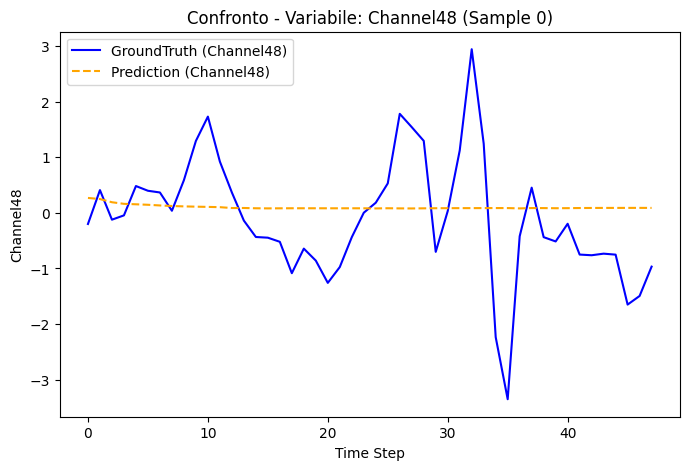

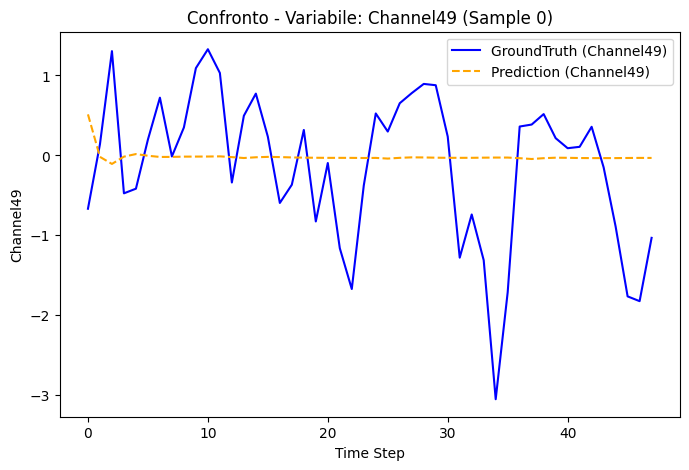

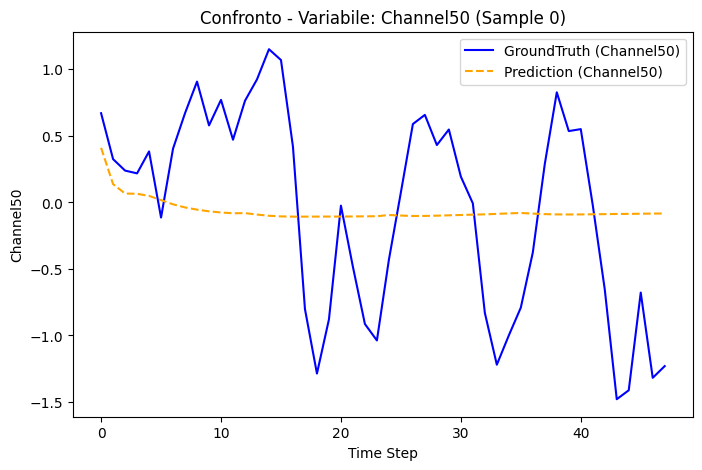

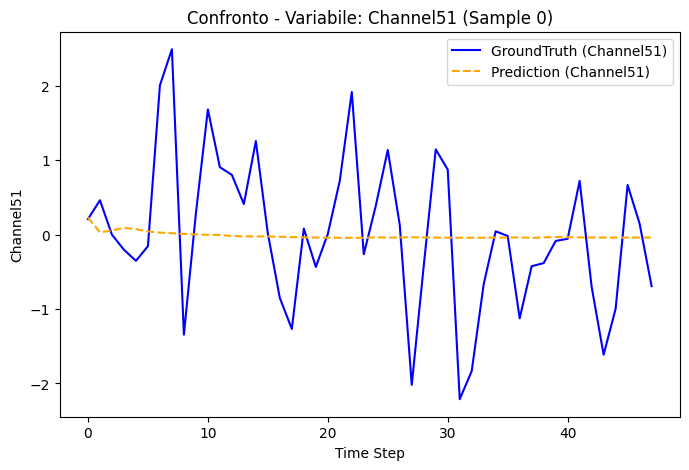

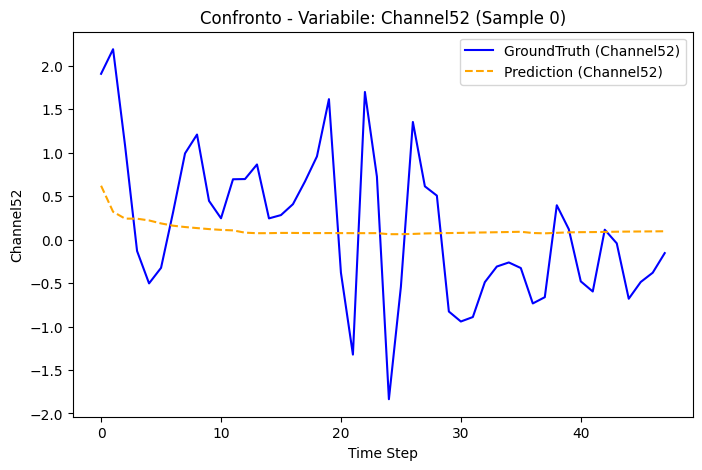

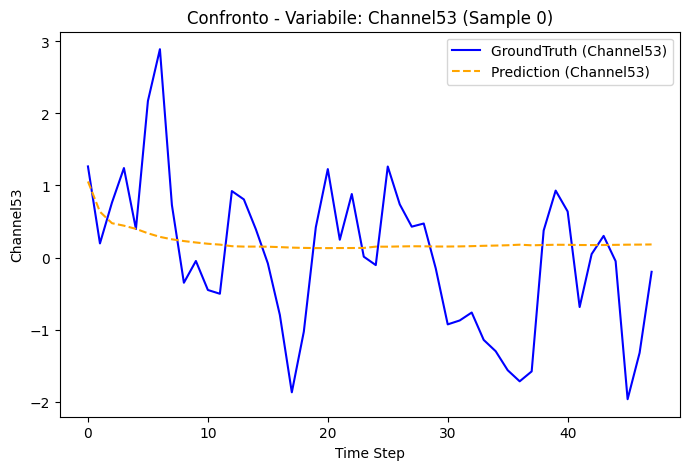

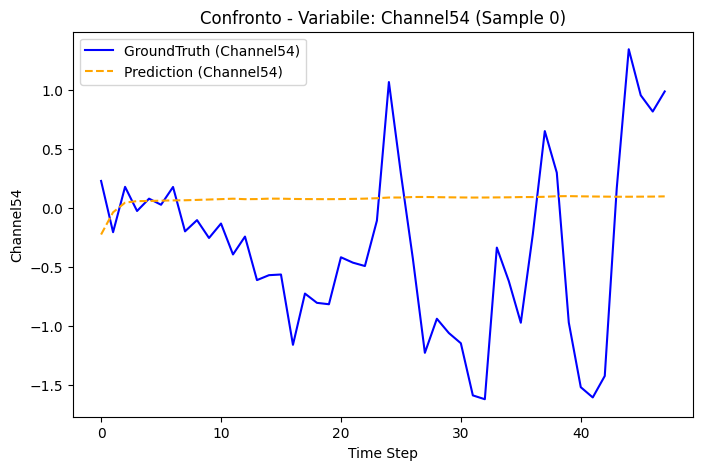

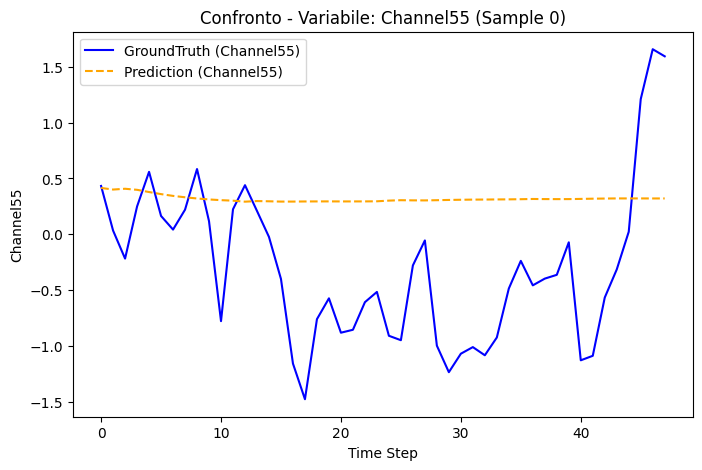

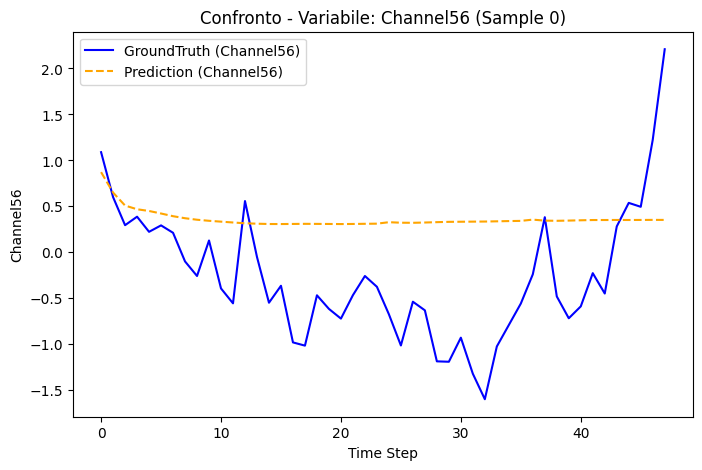

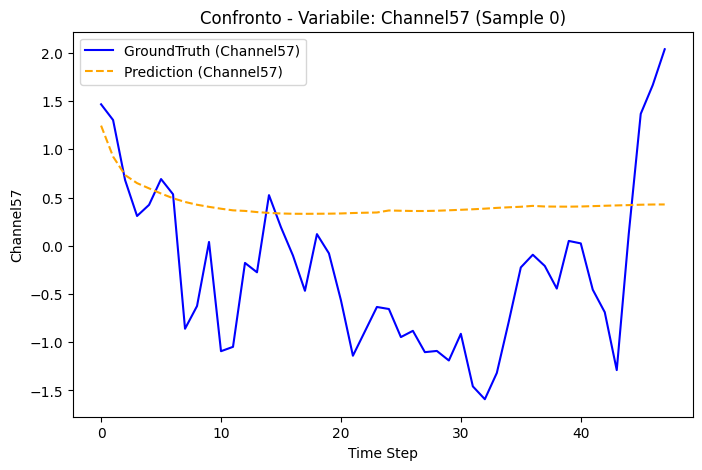

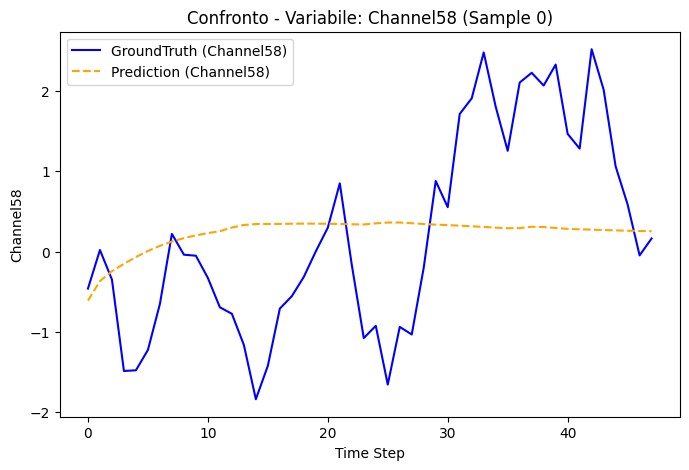

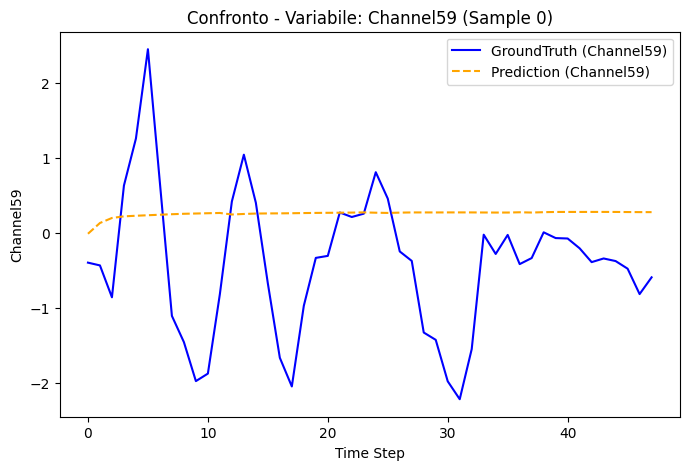

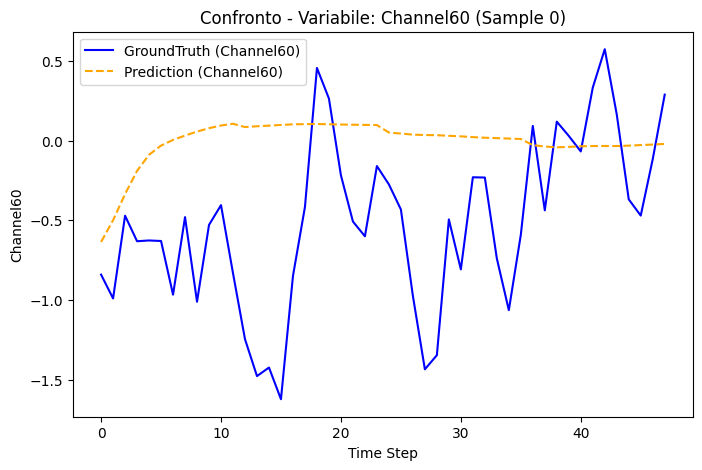

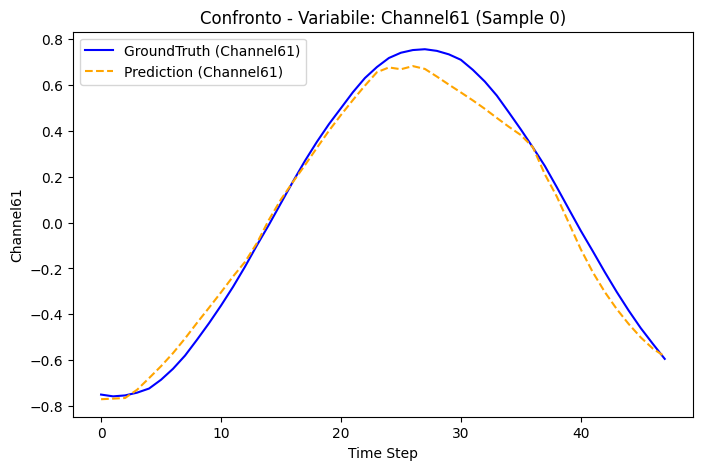

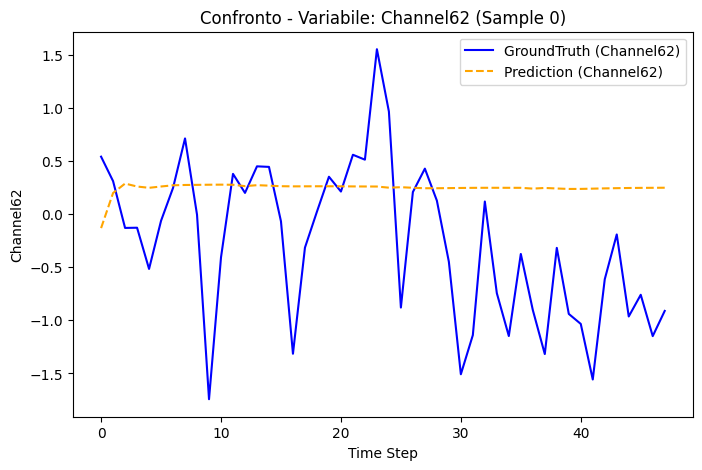

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# CI HA IMPIEGATO 93 MINUTI

# Sostituisci con il tuo setting o percorso
setting = 'long_term_forecast_ETTh1_48_48_SegRNN_custom_ftM_sl48_ll24_pl48_dm512_nh8_el2_dl1_df2048_expand2_dc4_fc1_ebtimeF_dtTrue_forecasting_48 usando SegRNN_0'
metrics_path = 'results/' + setting + '/metrics.npy'
pred_path = 'results/' + setting + '/pred.npy'
true_path = 'results/' + setting + '/true.npy'

# Caricamento dei file
metrics = np.load(metrics_path)
preds = np.load(pred_path)
trues = np.load(true_path)

# Stampa delle forme per verifica
print("Shape metrics:", metrics.shape)
print("Shape preds:", preds.shape)
print("Shape trues:", trues.shape)

# Stampa opzionale delle metriche
print("Metrics:\n", metrics)

# Assumiamo che la forma di preds e trues sia (n_samples, L, n_channels)
n_samples, L, n_channels = trues.shape

# Generiamo i nomi dei canali (1..n_channels)
variables = [f'Channel{i}' for i in range(1, n_channels + 1)]

# Seleziona il sample da plottare
idx_sample = 0  # cambia se vuoi visualizzare altri sample

# Plot per ogni variabile (canale)
for i, var_name in enumerate(variables):
    plt.figure(figsize=(8, 5))
    # Ground Truth
    plt.plot(
        trues[idx_sample, :, i],
        label=f'GroundTruth ({var_name})',
        color='blue'
    )
    # Prediction
    plt.plot(
        preds[idx_sample, :, i],
        label=f'Prediction ({var_name})',
        color='orange',
        linestyle='--'
    )
    plt.title(f'Confronto - Variabile: {var_name} (Sample {idx_sample})')
    plt.xlabel('Time Step')
    plt.ylabel(var_name)
    plt.legend()
    plt.show()


In [3]:
# Funzioni metriche
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

for i, var_name in enumerate(variables):
    y_true = trues[:, :, i].flatten()  # Ground truth per la variabile i
    y_pred = preds[:, :, i].flatten()  # Predizioni per la variabile i
    
    print(f"\n--- Metriche per la variabile: {var_name} ---")
    print(f"MAE : {mae(y_true, y_pred):.4f}")
    print(f"MSE : {mse(y_true, y_pred):.4f}")
    print(f"RMSE: {rmse(y_true, y_pred):.4f}")


--- Metriche per la variabile: Channel1 ---
MAE : 0.7770
MSE : 1.0110
RMSE: 1.0055

--- Metriche per la variabile: Channel2 ---
MAE : 0.7744
MSE : 1.0054
RMSE: 1.0027

--- Metriche per la variabile: Channel3 ---
MAE : 0.7774
MSE : 1.0101
RMSE: 1.0050

--- Metriche per la variabile: Channel4 ---
MAE : 0.7780
MSE : 1.0128
RMSE: 1.0064

--- Metriche per la variabile: Channel5 ---
MAE : 0.7761
MSE : 1.0108
RMSE: 1.0054

--- Metriche per la variabile: Channel6 ---
MAE : 0.7792
MSE : 1.0178
RMSE: 1.0088

--- Metriche per la variabile: Channel7 ---
MAE : 0.7805
MSE : 1.0211
RMSE: 1.0105

--- Metriche per la variabile: Channel8 ---
MAE : 0.7808
MSE : 1.0214
RMSE: 1.0107

--- Metriche per la variabile: Channel9 ---
MAE : 0.7806
MSE : 1.0158
RMSE: 1.0079

--- Metriche per la variabile: Channel10 ---
MAE : 0.7855
MSE : 1.0287
RMSE: 1.0142

--- Metriche per la variabile: Channel11 ---
MAE : 0.7843
MSE : 1.0233
RMSE: 1.0116

--- Metriche per la variabile: Channel12 ---
MAE : 0.7796
MSE : 1.0189
RM

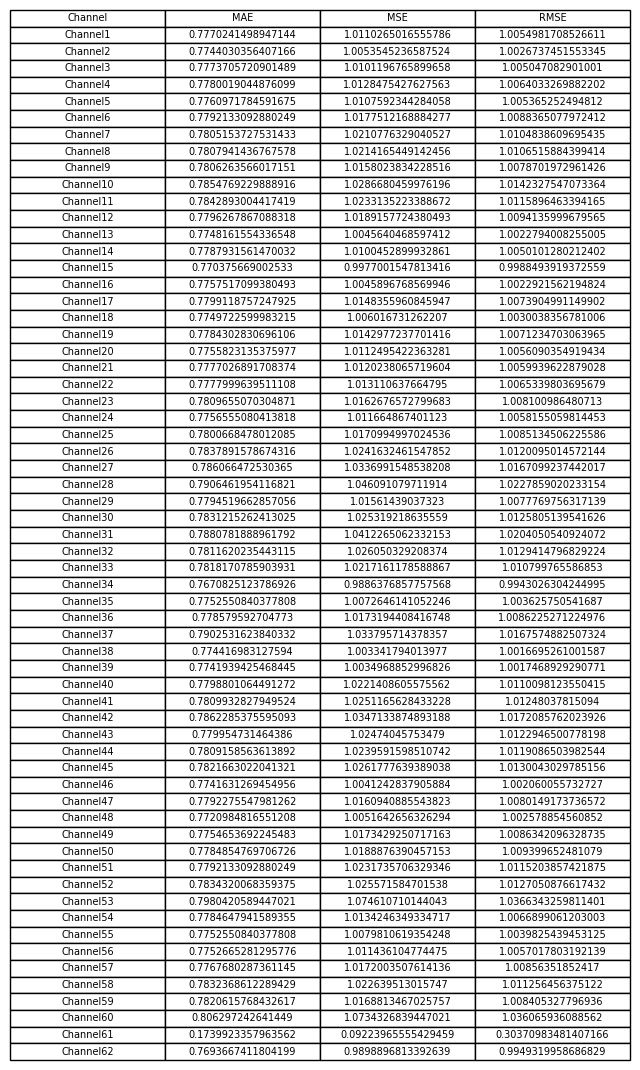

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Funzioni metriche
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

# Creazione di una lista per memorizzare le metriche
metrics_data = []

for i, var_name in enumerate(variables):
    y_true = trues[:, :, i].flatten()
    y_pred = preds[:, :, i].flatten()
    
    metrics_data.append([var_name, mae(y_true, y_pred), mse(y_true, y_pred), rmse(y_true, y_pred)])

# Creazione di un DataFrame
df_metrics = pd.DataFrame(metrics_data, columns=['Channel', 'MAE', 'MSE', 'RMSE'])

# Visualizzazione della tabella con matplotlib
fig, ax = plt.subplots(figsize=(8, 10))  # Dimensioni della figura
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, cellLoc = 'center', loc='center')

plt.show()

# Salva l'immagine nella cartella dei risultati
output_dir = f'./results/{setting}'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

fig.savefig(os.path.join(output_dir, 'metrics_table.png'))


--- Analisi MAE ---
Media: 0.7700, Mediana: 0.7792
Min: 0.1740, Max: 0.8063
Anomalie rilevate nei canali: [53 60 61]

--- Analisi MSE ---
Media: 1.0033, Mediana: 1.0166
Min: 0.0922, Max: 1.0746
Anomalie rilevate nei canali: [28 34 53 60 61 62]

--- Analisi RMSE ---
Media: 0.9977, Mediana: 1.0083
Min: 0.3037, Max: 1.0366
Anomalie rilevate nei canali: [28 34 53 60 61 62]


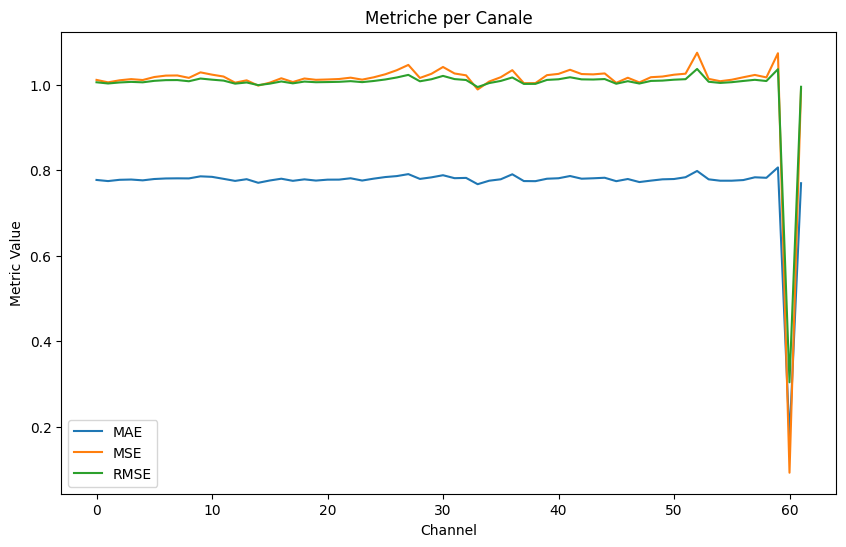

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Funzioni metriche
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

# Calcola metriche per ciascun canale
mae_list, mse_list, rmse_list = [], [], []

for i in range(preds.shape[2]):
    y_true = trues[:, :, i].flatten()
    y_pred = preds[:, :, i].flatten()

    mae_list.append(mae(y_true, y_pred))
    mse_list.append(mse(y_true, y_pred))
    rmse_list.append(rmse(y_true, y_pred))

# Converti in array per analisi
mae_array = np.array(mae_list)
mse_array = np.array(mse_list)
rmse_array = np.array(rmse_list)

# Calcola statistiche
metrics = {'MAE': mae_array, 'MSE': mse_array, 'RMSE': rmse_array}

for metric_name, values in metrics.items():
    print(f"\n--- Analisi {metric_name} ---")
    print(f"Media: {np.mean(values):.4f}, Mediana: {np.median(values):.4f}")
    print(f"Min: {np.min(values):.4f}, Max: {np.max(values):.4f}")

    # Rileva anomalie con IQR
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    anomalies = np.where((values < lower_bound) | (values > upper_bound))[0]
    if len(anomalies) > 0:
        print(f"Anomalie rilevate nei canali: {anomalies + 1}")
    else:
        print("Nessuna anomalia rilevata.")

# Visualizza le metriche
plt.figure(figsize=(10, 6))
plt.plot(mae_list, label='MAE')
plt.plot(mse_list, label='MSE')
plt.plot(rmse_list, label='RMSE')
plt.xlabel('Channel')
plt.ylabel('Metric Value')
plt.title('Metriche per Canale')
plt.legend()
plt.show()